# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_json = requests.get(btc_url, verify=False).json()
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]
print(f"Current BTC price: ${btc_price}")

# Fetch current ETH price
eth_json = requests.get(eth_url, verify=False).json()
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]
print(f"Current ETH price: ${eth_price}")

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Current BTC price: $20543.0
Current ETH price: $1104.95
The current value of your 1.2 BTC is $24651.60
The current value of your 5.3 ETH is $5856.23


/Users/mnguyen/opt/anaconda3/envs/fintech/lib/python3.7/site-packages/urllib3/connectionpool.py:1050: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.alternative.me'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Users/mnguyen/opt/anaconda3/envs/fintech/lib/python3.7/site-packages/urllib3/connectionpool.py:1050: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.alternative.me'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST()

In [8]:
# Format current date as ISO format

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df = alpaca_api.get_bars(tickers, timeframe, "2022-06-29", "2022-06-29").df
df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-29 04:00:00+00:00,100.80,101.235,100.68,101.22,7322871,21262,101.097062,AGG
2022-06-29 04:00:00+00:00,381.16,382.270,378.42,380.34,64478427,519970,380.393953,SPY


In [9]:
# Pick AGG and SPY close prices
agg_close_price = df[df.symbol == "AGG"]["close"][0]
spy_close_price = df[df.symbol == "SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $101.22
Current SPY closing price: $380.34


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $20244.00
The current value of your 50 SPY shares is $19017.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12_000
# Consolidate financial assets data
crypto_savings = my_btc_value + my_eth_value
stock_bond_savings = my_spy_value + my_agg_value
savings_data = [crypto_savings, stock_bond_savings]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data)
df_savings.columns = ["amount"]
df_savings.index = ["crypto", "stock/bond"]

# Display savings DataFrame
display(df_savings)

,amount
crypto,30507.835
stock/bond,39261.000


<AxesSubplot:title={'center':'Savings Composition'}, ylabel='amount'>

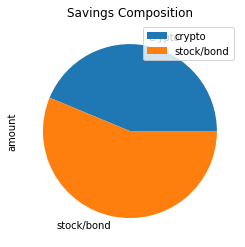

In [12]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="amount", title="Savings Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_portfolio_value = df_savings.sum()[0]

# Validate saving health
if total_portfolio_value > emergency_fund:
    print(f"Congratulations, your portfolio value of ${total_portfolio_value:0.2f} is enough for an emergency fund of ${emergency_fund:0.2f}!")
elif total_portfolio_value == emergency_fund:
    print(f"Congratulations on reaching an important financial goal with an emergency fund of ${total_portfolio_value:0.2f}!")
else:
    print(f"You are ${emergency_fund - total_portfolio_value:0.2f} away from reaching the emergency fund goal.")

Congratulations, your portfolio value of $69768.83 is enough for an emergency fund of $36000.00!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of **ten** years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2012-06-29', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-06-29', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_raw = alpaca_api.get_bars(tickers, timeframe, start_date, end_date).df

df_stock_data = df_raw.pivot(columns='symbol', values='close')
df_stock_data.columns = pd.MultiIndex.from_product([df_stock_data.columns, ['close']])

# Display sample data
df_stock_data.head()

symbol,AGG,SPY
,close,close
timestamp,,
2015-12-01 05:00:00+00:00,108.82,210.68
2015-12-02 05:00:00+00:00,108.67,208.54
2015-12-03 05:00:00+00:00,107.89,205.58
2015-12-04 05:00:00+00:00,108.24,209.66
2015-12-07 05:00:00+00:00,108.40,208.27


In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
portfolio_weights = [0.40, 0.60]
years = 30
mc = MCSimulation(df_stock_data, weights=portfolio_weights, num_simulation=500, num_trading_days=252*years)

In [17]:
# Printing the simulation input data
df_stock_data

symbol,AGG,SPY
,close,close
timestamp,,
2015-12-01 05:00:00+00:00,108.82,210.68
2015-12-02 05:00:00+00:00,108.67,208.54
2015-12-03 05:00:00+00:00,107.89,205.58
2015-12-04 05:00:00+00:00,108.24,209.66
2015-12-07 05:00:00+00:00,108.40,208.27
...,...,...
2022-06-23 04:00:00+00:00,101.21,378.06
2022-06-24 04:00:00+00:00,101.05,390.08


In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mnguyen/Documents/FinTech Bootcamp/05_api/financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003423,0.997528,0.994078,0.994651,0.998438,1.000691,0.998277,1.000844,1.004170,0.993880,...,1.011477,1.018689,1.006099,0.996331,0.998223,1.008976,1.017789,0.998736,0.992505,1.006842
2,1.009318,0.988352,0.976737,0.989367,1.006239,1.005439,1.003544,1.003052,1.009837,0.984839,...,1.009582,1.023482,1.007220,0.991799,1.006691,1.012185,1.027779,1.017386,0.994521,0.998836
3,1.007384,0.999796,0.974285,0.989035,1.005527,1.008076,0.999138,1.016919,1.008837,0.981770,...,1.009640,1.030346,1.014500,0.986964,1.000022,1.007834,1.040842,1.031153,0.993940,0.988857
4,0.999051,0.994860,0.966527,0.987671,1.005263,1.010816,0.989906,1.013716,1.005351,0.976253,...,0.990659,1.023655,1.009010,0.975261,1.005748,0.994256,1.028880,1.031653,0.990222,0.979261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.391944,4.495221,3.608540,3.047673,4.430781,8.891778,5.377755,0.977132,6.317293,3.521634,...,6.025376,4.766495,3.272314,5.226434,5.289035,6.391907,2.458484,8.002224,2.638059,6.438257
7557,2.378095,4.494807,3.573594,3.097727,4.457490,8.959088,5.354932,0.981317,6.340795,3.543956,...,6.141582,4.769634,3.292228,5.262778,5.333632,6.441939,2.459082,7.892405,2.633918,6.462139
7558,2.382180,4.545556,3.607289,3.099043,4.504882,8.930919,5.298254,0.989313,6.352810,3.557191,...,6.139589,4.711553,3.296359,5.322798,5.358621,6.459098,2.457844,7.950073,2.643657,6.479550
7559,2.403857,4.533225,3.621014,3.137755,4.457886,8.870786,5.329570,0.981199,6.376726,3.504826,...,6.123925,4.690352,3.320864,5.397120,5.407433,6.458891,2.459839,7.931273,2.659096,6.511482


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

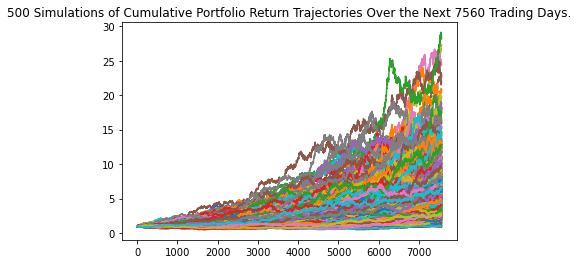

In [19]:
# Plot simulation outcomes
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

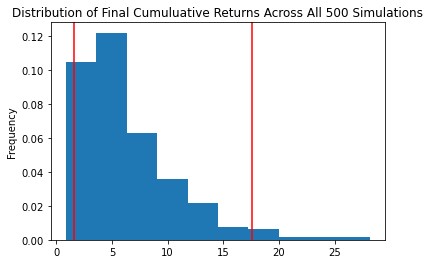

In [20]:
# Plot probability distribution and confidence intervals
mc.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
stats = mc.summarize_cumulative_return()

# Print summary statistics
stats

count           500.000000
mean              6.358488
std               4.216806
min               0.858215
25%               3.241149
50%               5.059491
75%               8.198922
max              28.183311
95% CI Lower      1.632693
95% CI Upper     17.580997
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = stats["95% CI Lower"] * initial_investment
ci_upper = stats["95% CI Upper"] * initial_investment


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $32653.87 and $351619.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = stats["95% CI Lower"] * initial_investment
ci_upper = stats["95% CI Upper"] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $48980.80 and $527429.92


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
portfolio_weights = [0.20, 0.80]
years = 5
mc5 = MCSimulation(df_stock_data, weights=portfolio_weights, num_simulation=500, num_trading_days=252*years)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mnguyen/Documents/FinTech Bootcamp/05_api/financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003955,1.003723,0.994390,1.010273,1.002383,0.999050,1.007023,1.007414,1.001610,0.998521,...,1.009466,1.008850,1.005925,0.985167,0.998202,1.010541,0.987411,0.998326,0.998284,1.006262
2,0.997881,1.030371,0.985249,0.984238,1.012481,1.000102,1.011478,0.999681,0.995872,0.999950,...,1.020237,1.001172,1.009822,0.996619,0.999502,1.016900,0.990083,0.997194,0.988966,1.000042
3,1.001166,1.022123,0.989576,0.994386,1.008815,1.020051,1.017363,0.992581,1.014428,1.009379,...,1.036601,1.005100,1.009652,0.997507,0.993201,1.011656,0.973917,0.978262,0.985228,1.012822
4,0.994576,1.030791,0.989714,1.003502,0.999760,1.019971,1.012096,0.996624,1.031358,1.016584,...,1.034902,0.998268,1.030301,1.010837,0.999052,1.016658,0.973412,0.989760,0.986200,1.006556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.277106,0.948664,2.151747,1.769521,1.067732,1.226015,1.057823,0.657015,1.255577,2.908470,...,1.647283,2.625401,1.219289,0.924026,1.325955,2.881935,1.194226,1.146095,1.368324,1.196500
1257,1.266802,0.966955,2.110561,1.800427,1.058483,1.216569,1.051426,0.659728,1.260336,2.893649,...,1.628480,2.631785,1.218972,0.931267,1.307763,2.947438,1.193862,1.141825,1.378179,1.188901
1258,1.279367,0.975037,2.070060,1.793511,1.047846,1.217439,1.049860,0.656588,1.259235,2.868396,...,1.625707,2.651446,1.239561,0.938622,1.291214,2.897633,1.183158,1.138863,1.383622,1.219510
1259,1.291927,0.959989,2.079226,1.791989,1.050230,1.226953,1.045659,0.655401,1.256828,2.857792,...,1.645058,2.650215,1.231770,0.934941,1.283513,2.920097,1.186613,1.128632,1.383700,1.229687


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

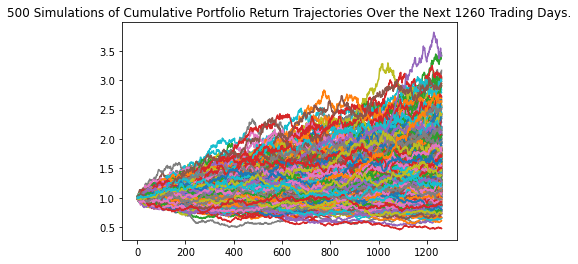

In [26]:
# Plot simulation outcomes
mc5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

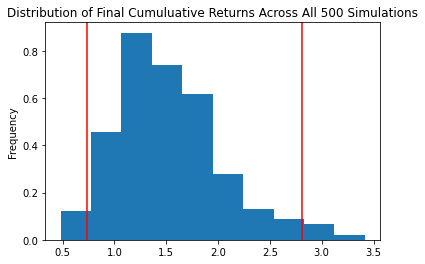

In [27]:
# Plot probability distribution and confidence intervals
mc5.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
stats5 = mc5.summarize_cumulative_return()

# Print summary statistics
stats5

count           500.000000
mean              1.520236
std               0.520769
min               0.479180
25%               1.140619
50%               1.441571
75%               1.801947
max               3.416620
95% CI Lower      0.738988
95% CI Upper      2.813485
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = stats5["95% CI Lower"] * initial_investment
ci_upper_five = stats5["95% CI Upper"] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0.2f} and ${ci_upper_five:0.2f}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 5 years will end within in the range of $22169.65 and $84404.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
portfolio_weights = [0.20, 0.80]
years = 10
mc10 = MCSimulation(df_stock_data, weights=portfolio_weights, num_simulation=500, num_trading_days=252*years)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mnguyen/Documents/FinTech Bootcamp/05_api/financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001173,0.995146,0.990212,1.007415,0.990261,0.997761,1.005355,1.001310,0.993955,1.003247,...,0.990891,0.994569,0.988404,0.993923,0.997051,0.999004,0.991182,1.002532,0.996469,0.994766
2,0.994429,1.003954,0.976352,1.005652,0.969964,0.996337,1.005426,0.997643,0.992351,0.996371,...,0.979788,1.000878,0.993089,0.993231,0.989336,0.993041,0.992066,1.002987,1.004882,0.984640
3,0.998480,0.996112,0.963696,1.019050,0.974856,0.998433,1.021268,1.002468,0.998528,0.986090,...,0.991769,0.991313,0.999062,1.005190,0.979960,0.993827,0.983773,1.010654,1.004921,0.985221
4,0.997834,0.992835,0.962367,1.020484,0.979581,0.995238,1.034290,0.998119,0.999667,1.002943,...,0.995283,0.975031,1.006832,1.006436,0.987787,1.005378,0.989496,0.994984,0.997802,0.987072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.468397,0.733572,2.389386,2.168349,1.742053,3.496774,2.245074,1.388694,2.440786,2.333477,...,3.209642,2.156255,3.959650,2.338697,3.399874,3.521869,1.341083,1.349347,4.146069,2.774811
2517,2.458452,0.741165,2.420530,2.168808,1.767410,3.449397,2.215621,1.385570,2.451302,2.331832,...,3.209313,2.176249,3.933223,2.363081,3.360887,3.562320,1.380306,1.339207,4.163233,2.775136
2518,2.396415,0.745449,2.428342,2.191008,1.730300,3.517452,2.222242,1.399480,2.457344,2.338232,...,3.211120,2.191146,3.929713,2.340510,3.397643,3.569778,1.376633,1.342349,4.181523,2.735794
2519,2.375850,0.737346,2.397730,2.166972,1.713070,3.482781,2.224029,1.396012,2.449987,2.323710,...,3.238985,2.181401,3.854435,2.336180,3.396359,3.505310,1.387072,1.341519,4.210632,2.758243


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

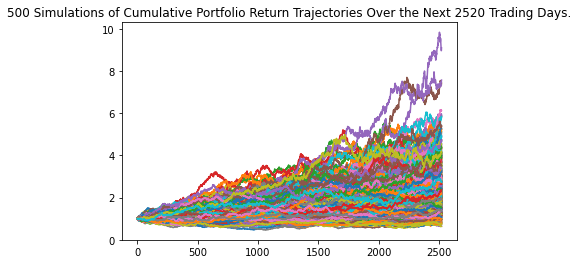

In [32]:
# Plot simulation outcomes
mc10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

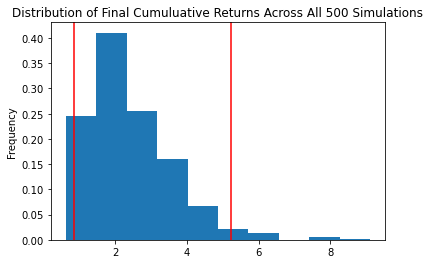

In [33]:
# Plot probability distribution and confidence intervals
mc10.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
stats10 = mc10.summarize_cumulative_return()

# Print summary statistics
stats10

count           500.000000
mean              2.419884
std               1.164747
min               0.630663
25%               1.586780
50%               2.169267
75%               3.043876
max               9.107053
95% CI Lower      0.853899
95% CI Upper      5.221999
Name: 2520, dtype: float64

In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = stats10["95% CI Lower"] * initial_investment
ci_upper_ten = stats10["95% CI Upper"] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0.2f} and ${ci_upper_ten:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $51233.94 and $313319.94
